# Hierarchical Clustering

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 1. Combine all three arrays a,b,c into a dataframe
#### Hint: Use concatenate function from numpy and axis=0

In [106]:
df_a=pd.DataFrame(a)
df_b=pd.DataFrame(b)
df_c=pd.DataFrame(c)
frames=[df_a,df_b,df_c]
df_final=pd.concat(frames)

df_final.describe()

,0,1
count,250.000000,250.000000
mean,8.059822,12.010199
std,4.351794,10.214537
min,-4.599682,-6.238665
25%,6.997280,0.537831
50%,9.536742,17.791111
75%,10.994620,20.530821
max,13.882785,25.652581


### 2. Use scatter plot to print all the 3 distributions

In [107]:
df_final.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


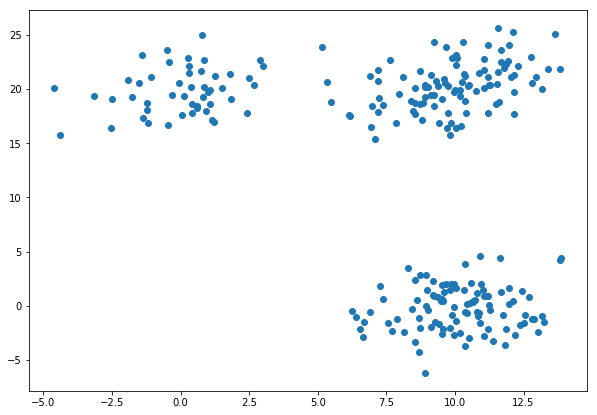

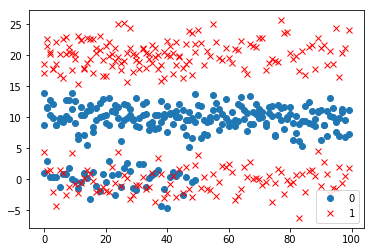

In [122]:
##df_final.plot(style=['o','rx'])

plt.figure(figsize=(10, 7))  
plt.scatter(df_final[0], df_final[1]) 

df_final.plot(style=['o','rx'])

### 3. Find linkage matrix
#### Use ward as linkage metric and distance as Eucledian. 
#### From scipy.cluster.hierarchy import dendrogram, linkage
#### Generate the linkage matrix

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage
##from sklearn.cluster import AgglomerativeClustering 

In [111]:
Y = pdist(df_final, 'euclidean')
Z = linkage(Y, 'ward')
##c, coph_dists = cophenet(Z , pdist(df_final))

print('Linkage Matrix as follows')
Z

Linkage Matrix as follows


array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

In [77]:
##model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
##model.fit(df_final)
##model.labels_

### 4. Plot the dendrogram for the consolidated dataframe

In [112]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

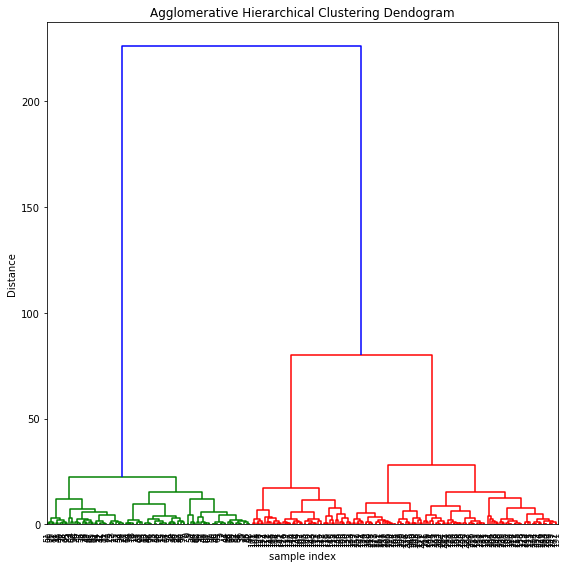

In [113]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()

### 5. Recreate the dendrogram for last 12 merged clusters
#### Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

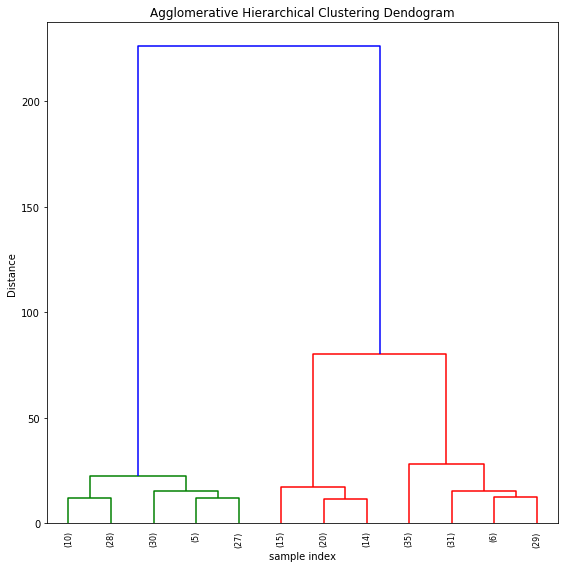

In [114]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,p=12, truncate_mode='lastp' ,leaf_font_size=8. )
plt.tight_layout()

### 6.From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

Optimal clusters is 3 , The horizantal line exactly cuts at y=50, where we can get 3 clusters


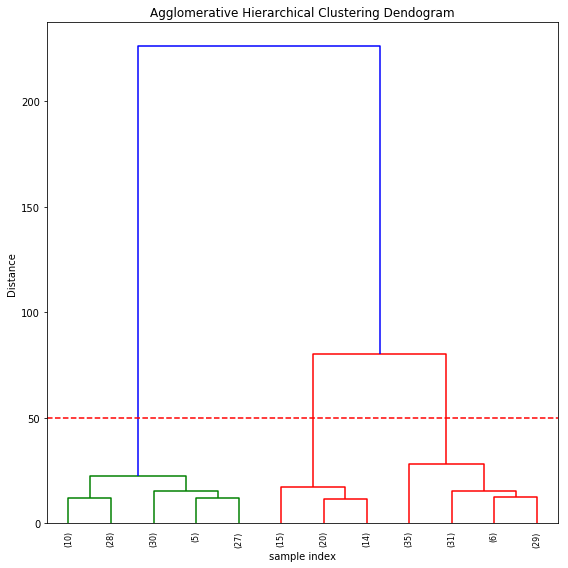

In [115]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,p=12, truncate_mode='lastp' ,leaf_font_size=8. )
plt.tight_layout()
plt.axhline(y=50, color='r', linestyle='--')

print('Optimal clusters is 3 , The horizantal line exactly cuts at y=50, where we can get 3 clusters')

### 7. Use distance measure and fcluster function to cluster the data into 3 different groups
#### Hint: From scipy.cluster.hierarchy Import fcluster and use criterion as "distance". Print clusters to view the clustered data

In [117]:
fcluster(Z,t=50,criterion='distance')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### 8. Use matplotlib to visually observe the clusters

In [123]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_final)
model.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

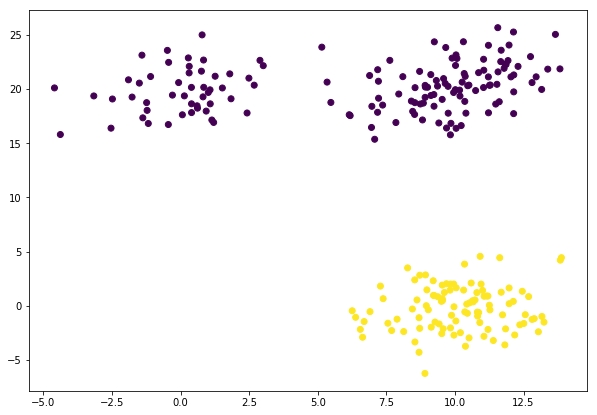

In [124]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_final[0], df_final[1], c=model.labels_) 

